# INDIAN PREMIER LEAGUE DATA ANALYTICS
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by
the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was ₹475 billion (US$6.7 billion)
### Dataset Exploratory Analysis
#### Dataset link: https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020


## Exploratory Data analysis
### Utilises Medallion architecture for understanding, transforming and producing the final dataset used further for Training ML models
#### Medallion architecture contains of Bronze, Silver and Gold Layer of Dataset analysis


### Bronze layer 
#### Loading of raw data in notebook, loading of different libraries required

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly
from plotly.offline import plot, iplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

### Silver layer 
#### Understanding, Cleaning, standardizing, filtering dataset

#### Describe Data

In [4]:
print(f"Matches DataFrame shape: {matches.shape} (rows, columns)")
print(f"Deliveries DataFrame shape: {deliveries.shape} (rows, columns)")


Matches DataFrame shape: (1095, 20) (rows, columns)
Deliveries DataFrame shape: (260920, 17) (rows, columns)


In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [9]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [10]:
matches.describe(include='object')

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,method,umpire1,umpire2
count,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1095,21,1095,1095
unique,17,36,823,8,291,58,19,19,19,2,19,4,2,1,62,62
top,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,AK Chaudhary,S Ravi
freq,76,173,2,1029,25,77,135,138,143,704,144,578,1081,21,115,83


In [11]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [12]:
deliveries.describe(include='object')

,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder
count,260920,260920,260920,260920,260920,14125,12950,12950,9354
unique,19,19,673,530,663,5,629,10,607
top,Mumbai Indians,Mumbai Indians,V Kohli,R Ashwin,V Kohli,wides,RG Sharma,caught,MS Dhoni
freq,31437,31505,6236,4679,6067,8380,223,8063,220


In [13]:
# Date to Year for better EDA
matches['year'] = pd.to_datetime(matches['date']).dt.year

#### Explore Data

##### Explore Data related with Matches

In [14]:
#Number of Matches Played
total_matches = matches.shape[0]
print(f"Total matches played: {total_matches}")

Total matches played: 1095


In [15]:
#Number of Seasons Played
print(f"The dataset includes {matches['season'].nunique()} unique IPL seasons.")

The dataset includes 17 unique IPL seasons.


In [ ]:
#Total number of players
all_players = pd.concat([deliveries['batter'], deliveries['non_striker'], deliveries['bowler']])
total_players = all_players.nunique()
print(f"Total number of players: {total_players}")

Total number of players: 732


winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Name: count, dtype: int64


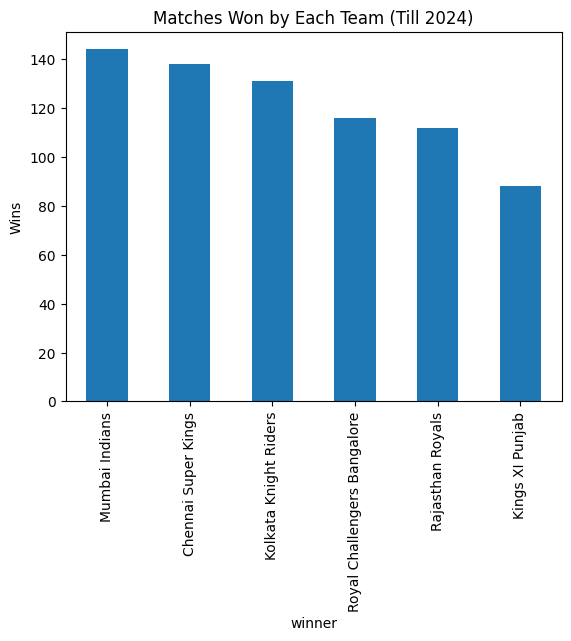

In [64]:
#Maximum number of matches won by each team till 2024
team_wins = matches['winner'].value_counts()[0:6]
print(team_wins)
team_wins.plot(kind='bar', title='Matches Won by Each Team (Till 2024)')
plt.ylabel('Wins')
plt.show()

In [30]:
# Super over typically starts from 3rd inning onwards
super_over_ids = deliveries[deliveries['inning'] > 2]['match_id'].unique()
super_over_matches = matches[matches['id'].isin(super_over_ids)]
super_over_per_year = super_over_matches.groupby('year').size().reset_index(name='Super Overs')
print("Super Over Matches Each Year:")
print(super_over_per_year)


Super Over Matches Each Year:
   year  Super Overs
0  2009            1
1  2010            1
2  2013            2
3  2014            1
4  2015            1
5  2017            1
6  2019            2
7  2020            4
8  2021            1


In [31]:
# Additional: Total number of unique venues
unique_venues = matches['venue'].nunique()
print(f"Total number of unique venues IPL matches were played at: {unique_venues}")

Total number of unique venues IPL matches were played at: 58


In [32]:
#Matches played in each venue
df_venue_counts = matches['venue'].value_counts()
print("Matches played in each venue:")
print(df_venue_counts)

Matches played in each venue:
venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai            

##### Explore Data related with Players (Batsman, Bowler & All-Rounder)

In [17]:
#Number of Batsmen
batsmen = deliveries['batter'].nunique()
print(f"Number of Batsmen: {batsmen}")

Number of Batsmen: 673


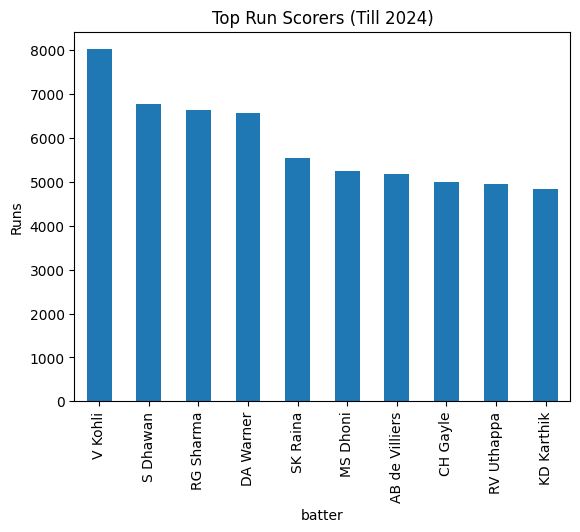

In [33]:
#Most runs by a player till 2024
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='bar', title='Top Run Scorers (Till 2024)')
plt.ylabel('Runs')
plt.show()

Top scorer each year:
      year         batter  batsman_runs
115   2008       SE Marsh           616
229   2009      ML Hayden           572
446   2010   SR Tendulkar           618
502   2011       CH Gayle           608
684   2012       CH Gayle           733
910   2013     MEK Hussey           733
1088  2014     RV Uthappa           660
1148  2015      DA Warner           562
1383  2016        V Kohli           973
1422  2017      DA Warner           641
1594  2018  KS Williamson           735
1694  2019      DA Warner           692
1866  2020       KL Rahul           676
2051  2021     RD Gaikwad           635
2144  2022     JC Buttler           863
2423  2023   Shubman Gill           890
2606  2024        V Kohli           741


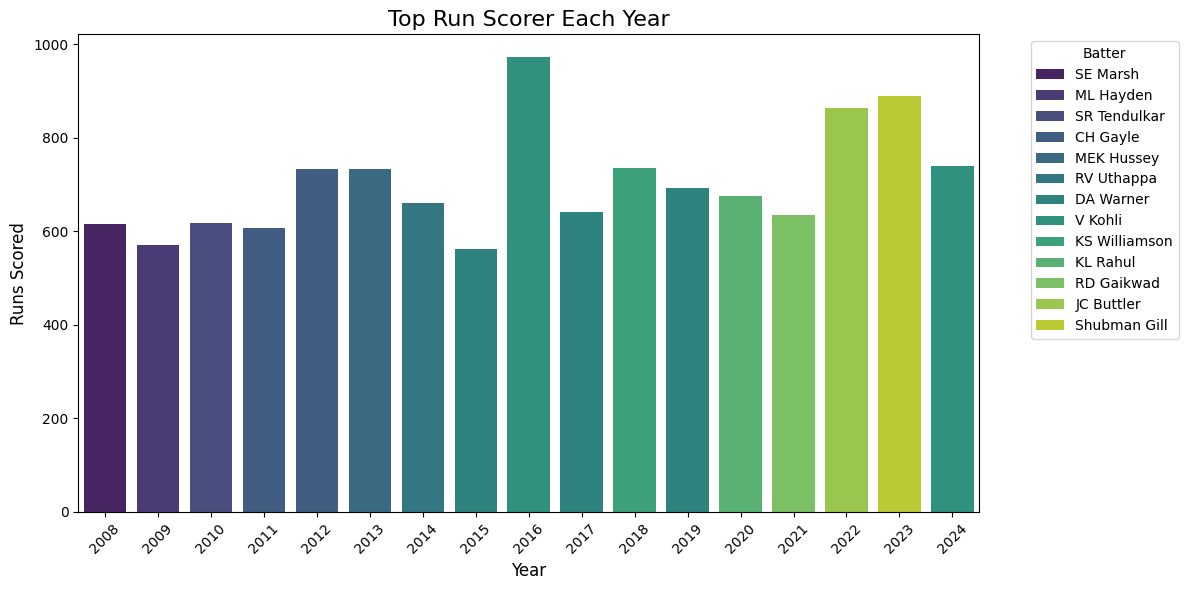

In [25]:
#Highest run scorer each year
deliveries_with_year = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id')
yearly_batters = deliveries_with_year.groupby(['year', 'batter'])['batsman_runs'].sum().reset_index()
top_each_year = yearly_batters.sort_values(['year', 'batsman_runs'], ascending=[True, False]).groupby('year').head(1)
print("Top scorer each year:")
print(top_each_year)

# Plotting the top run scorer each year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_each_year, x='year', y='batsman_runs', hue='batter', dodge=False, palette='viridis')

plt.title('Top Run Scorer Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runs Scored', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [28]:
#Batter strike rate with at least 15 matches and 10+ balls faced per match
deliveries_with_year['ball_count'] = 1
batter_match_stats = deliveries_with_year.groupby(['batter', 'match_id']).agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball_count', 'sum')
).reset_index()

# Filter players who faced at least 10 balls in a match
batter_match_stats = batter_match_stats[batter_match_stats['balls_faced'] >= 10]

# Count qualifying matches per batter
qualified_matches = batter_match_stats.groupby('batter').size().reset_index(name='matches_played')

# Aggregate total runs and balls faced across those matches
total_stats = batter_match_stats.groupby('batter').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('balls_faced', 'sum')
).reset_index()

# Merge both to compute strike rate
batter_sr = pd.merge(total_stats, qualified_matches, on='batter')
batter_sr = batter_sr[batter_sr['matches_played'] >= 15]
batter_sr['strike_rate'] = (batter_sr['total_runs'] / batter_sr['total_balls']) * 100
print("Top strike rates (min 15 matches with min 10 balls each):")
print(batter_sr.sort_values('strike_rate', ascending=False).head(10))

Top strike rates (min 15 matches with min 10 balls each):
             batter  total_runs  total_balls  matches_played  strike_rate
464         TM Head         737          419              15   175.894988
424       SP Narine        1223          698              34   175.214900
27       AD Russell        2315         1346              68   171.991085
459        TH David         587          349              21   168.194842
156       H Klaasen         928          563              23   164.831261
237  LS Livingstone         856          526              23   162.737643
295        N Pooran        1646         1020              46   161.372549
91        CH Morris         428          268              16   159.701493
152      GJ Maxwell        2500         1578              68   158.428390
326      PJ Cummins         421          266              15   158.270677


Top 10 Most Consistent Batters (Min 50 Matches):
           batter       mean        std  count  consistency_score
454      R Dravid  26.512195  19.519692     82           1.358228
470     RA Jadeja  16.438889  12.434932    180           1.321993
261     JP Duminy  27.053333  20.466118     75           1.321860
563  SR Tendulkar  29.923077  22.656537     78           1.320726
188  F du Plessis  33.123188  25.326900    138           1.307826
289      KL Rahul  38.434426  29.442755    122           1.305395
562     SPD Smith  26.827957  20.652205     93           1.299036
374      MS Dhoni  22.995614  18.281812    228           1.257841
542      SE Marsh  36.072464  29.014864     69           1.243241
490       RR Pant  29.972727  24.226931    110           1.237166


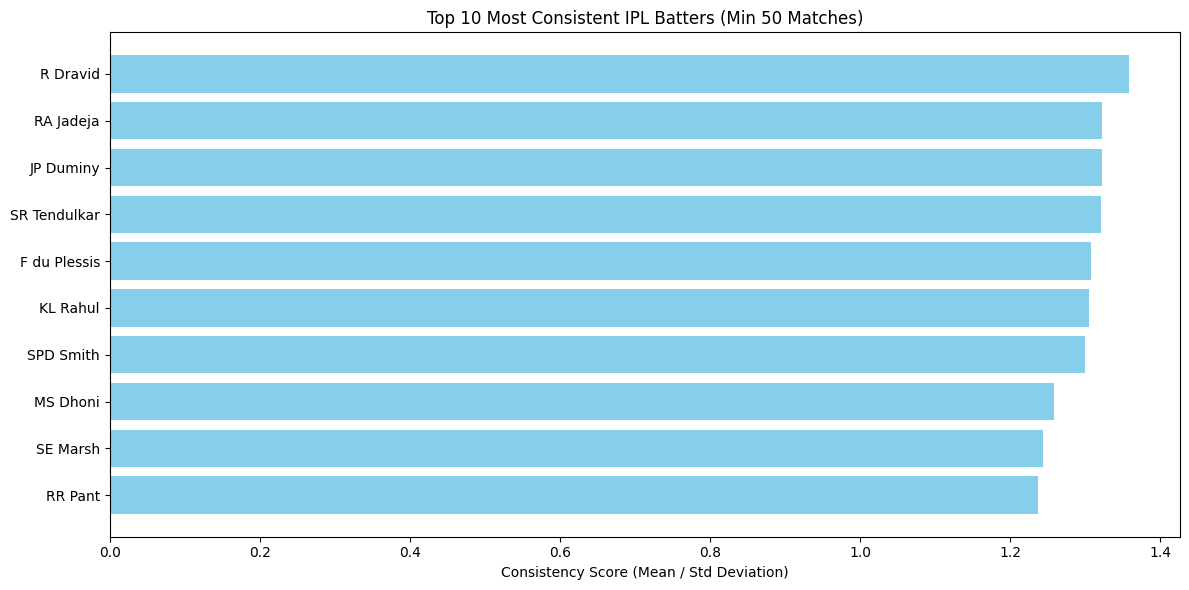

In [ ]:
# Most consistent IPL batters with at least 50 matches played

# Group match-wise total score per batter
batter_scores = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()

# Aggregate stats per batter
batter_summary = batter_scores.groupby('batter')['batsman_runs'].agg(['mean', 'std', 'count']).reset_index()

# Filter: players with at least 50 innings
batter_summary_50 = batter_summary[batter_summary['count'] >= 50]

# Sort: highest consistency score (mean / std)
batter_summary_50['consistency_score'] = batter_summary_50['mean'] / batter_summary_50['std']
most_consistent_50 = batter_summary_50.sort_values('consistency_score', ascending=False).head(10)

print("Top 10 Most Consistent Batters (Min 50 Matches):")
print(most_consistent_50[['batter', 'mean', 'std', 'count', 'consistency_score']])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(most_consistent_50['batter'], most_consistent_50['consistency_score'], color='skyblue')
plt.xlabel('Consistency Score (Mean / Std Deviation)')
plt.title('Top 10 Most Consistent IPL Batters (Min 50 Matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Elite IPL Finishers in Death Overs (16–20):

             batter  batsman_runs  ball  strike_rate  matches_played
27   AB de Villiers          1868   867   215.455594             170
444         RR Pant           923   480   192.291667             110
109        CH Gayle           581   304   191.118421             141
217      JC Buttler           596   319   186.833856             106
515       SV Samson           780   430   181.395349             162
34       AD Russell          1324   739   179.161028             104
567         V Kohli          1469   824   178.276699             244
551        TH David           540   308   175.324675              35


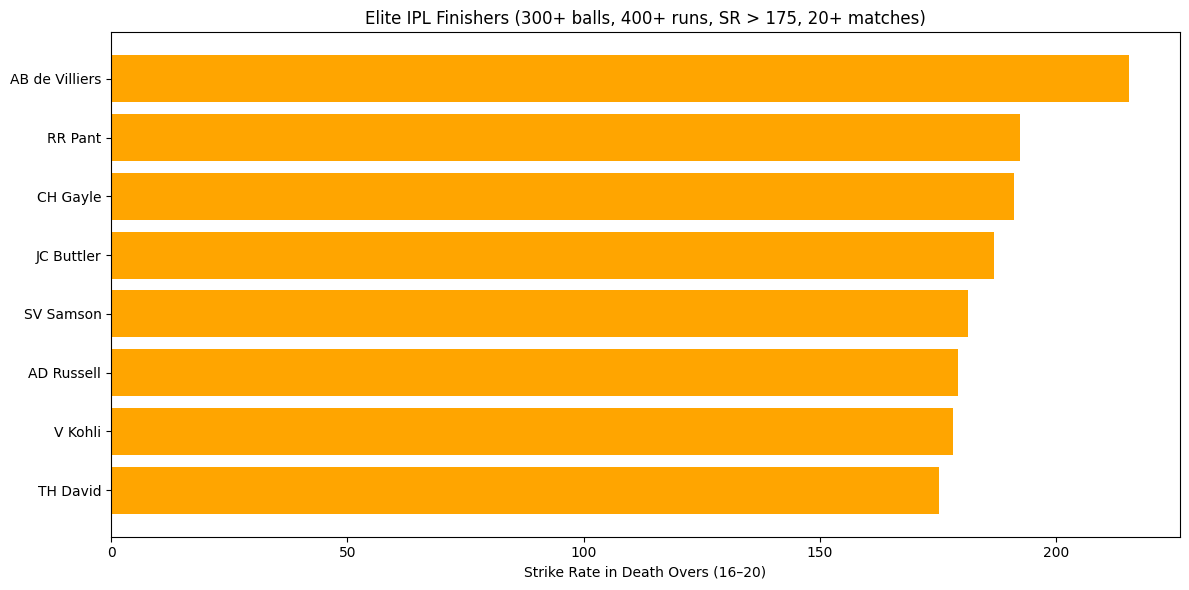

In [36]:
# Best IPL finishers in death overs (16–20) with specific criteria

# Step 1: Calculate number of matches played by each batter
batter_matches = deliveries.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

# Step 2: Filter deliveries for death overs (overs 16 to 20)
death_overs = deliveries[deliveries['over'] >= 15]

# Step 3: Aggregate batsman runs and balls faced
death_stats = death_overs.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Step 4: Calculate strike rate
death_stats['strike_rate'] = (death_stats['batsman_runs'] / death_stats['ball']) * 100

# Step 5: Merge with match count info
death_stats = pd.merge(death_stats, batter_matches, on='batter', how='left')

# Step 6: Apply filters
elite_finishers = death_stats[
    (death_stats['ball'] >= 300) &
    (death_stats['strike_rate'] > 175) &
    (death_stats['batsman_runs'] > 400) &
    (death_stats['matches_played'] > 20)
]

# Step 7: Sort by strike rate
elite_finishers_sorted = elite_finishers.sort_values('strike_rate', ascending=False)

# Step 8: Display results
print("Elite IPL Finishers in Death Overs (16–20):\n")
print(elite_finishers_sorted[['batter', 'batsman_runs', 'ball', 'strike_rate', 'matches_played']])

plt.figure(figsize=(12, 6))
plt.barh(elite_finishers_sorted['batter'], elite_finishers_sorted['strike_rate'], color='orange')
plt.xlabel('Strike Rate in Death Overs (16–20)')
plt.title('Elite IPL Finishers (300+ balls, 400+ runs, SR > 175, 20+ matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


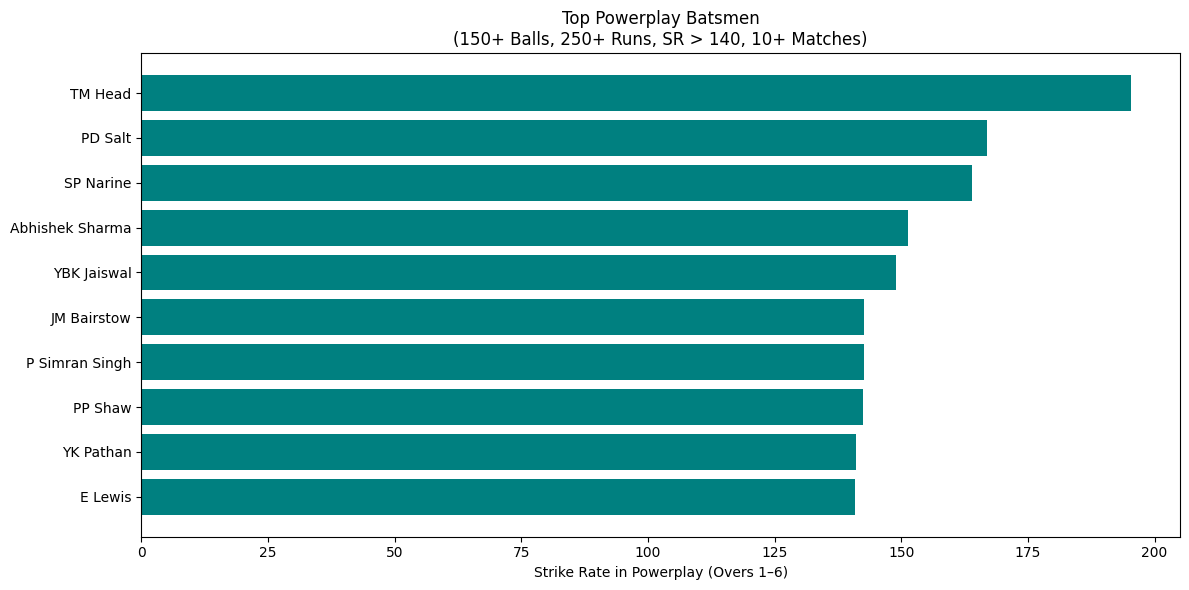

In [54]:
# Step 1: Calculate number of matches played per batter
batter_matches = deliveries.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

# Step 2: Filter for powerplay overs (0–5)
powerplay = deliveries[deliveries['over'] < 6]

# Step 3: Aggregate stats in powerplay
pp_stats = powerplay.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Step 4: Calculate strike rate
pp_stats['strike_rate'] = (pp_stats['batsman_runs'] / pp_stats['ball']) * 100

# Step 5: Merge with match counts
pp_stats = pd.merge(pp_stats, batter_matches, on='batter', how='left')

# Step 6: Apply all filters
# - Min 200 balls faced
# - Min 400 runs
# - Strike rate > 175
# - Min 25 matches
pp_top_filtered = pp_stats[
    (pp_stats['ball'] >= 150) &
    (pp_stats['batsman_runs'] > 250) &
    (pp_stats['strike_rate'] > 140) &
    (pp_stats['matches_played'] > 10)
]

# Step 7: Sort by strike rate and get top 10
pp_top_10 = pp_top_filtered.sort_values('strike_rate', ascending=False).head(10)

# Show final result
pp_top_10[['batter', 'batsman_runs', 'ball', 'strike_rate', 'matches_played']]

# Plot the filtered powerplay top 10 batters
plt.figure(figsize=(12, 6))
plt.barh(pp_top_10['batter'], pp_top_10['strike_rate'], color='teal')
plt.xlabel('Strike Rate in Powerplay (Overs 1–6)')
plt.title('Top Powerplay Batsmen\n(150+ Balls, 250+ Runs, SR > 140, 10+ Matches)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [30]:
# Count of 4s and 6s
num_fours = deliveries[deliveries['batsman_runs'] == 4].shape[0]
num_sixes = deliveries[deliveries['batsman_runs'] == 6].shape[0]

print(f"Total number of fours hit: {num_fours}")
print(f"Total number of sixes hit: {num_sixes}")


Total number of fours hit: 29850
Total number of sixes hit: 13051


Top six-hitting batter per season:

    year           batter  Sixes
0   2008    ST Jayasuriya     31
1   2009     AC Gilchrist     29
2   2010       RV Uthappa     27
3   2011         CH Gayle     44
4   2012         CH Gayle     59
5   2013         CH Gayle     52
6   2014       GJ Maxwell     36
7   2015         CH Gayle     38
8   2016          V Kohli     38
9   2017        DA Warner     26
10  2018          RR Pant     37
11  2019       AD Russell     52
12  2020     Ishan Kishan     30
13  2021         KL Rahul     30
14  2022       JC Buttler     45
15  2023     F du Plessis     36
16  2024  Abhishek Sharma     42


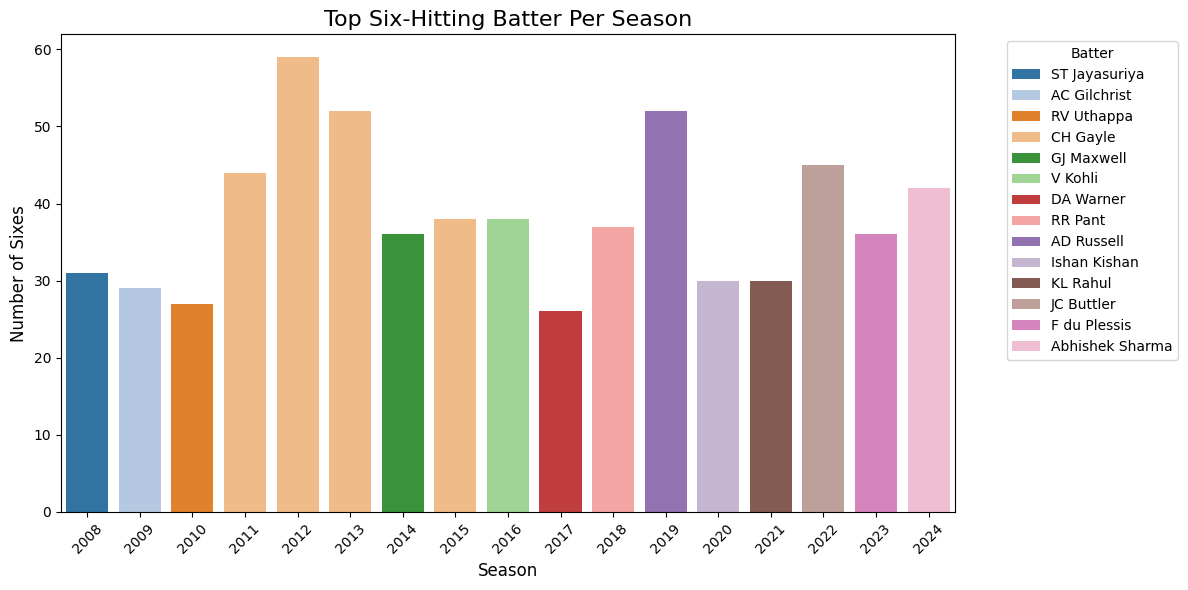

In [61]:
#  Filter only sixes
sixes = deliveries_with_year[deliveries_with_year['batsman_runs'] == 6]

#  Group by year and batter, count sixes
sixes_per_batter = sixes.groupby(['year', 'batter']).size().reset_index(name='Sixes')
top_six_hitters = sixes_per_batter.sort_values(['year', 'Sixes'], ascending=[True, False]) \
                                   .groupby('year').head(1).reset_index(drop=True)

print("Top six-hitting batter per season:\n")
print(top_six_hitters)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_six_hitters, x='year', y='Sixes', hue='batter', dodge=False, palette='tab20')


plt.title("Top Six-Hitting Batter Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Sixes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top four-hitting batter per season:

    year        batter  Fours
0   2008     G Gambhir     68
1   2009     ML Hayden     60
2   2010  SR Tendulkar     86
3   2011  SR Tendulkar     67
4   2012     AM Rahane     73
5   2013    MEK Hussey     81
6   2014    RV Uthappa     74
7   2015     DA Warner     65
8   2016     DA Warner     88
9   2017     DA Warner     63
10  2018       RR Pant     68
11  2019      S Dhawan     64
12  2020      S Dhawan     67
13  2021    RD Gaikwad     64
14  2022    JC Buttler     84
15  2023  Shubman Gill     85
16  2024       TM Head     64


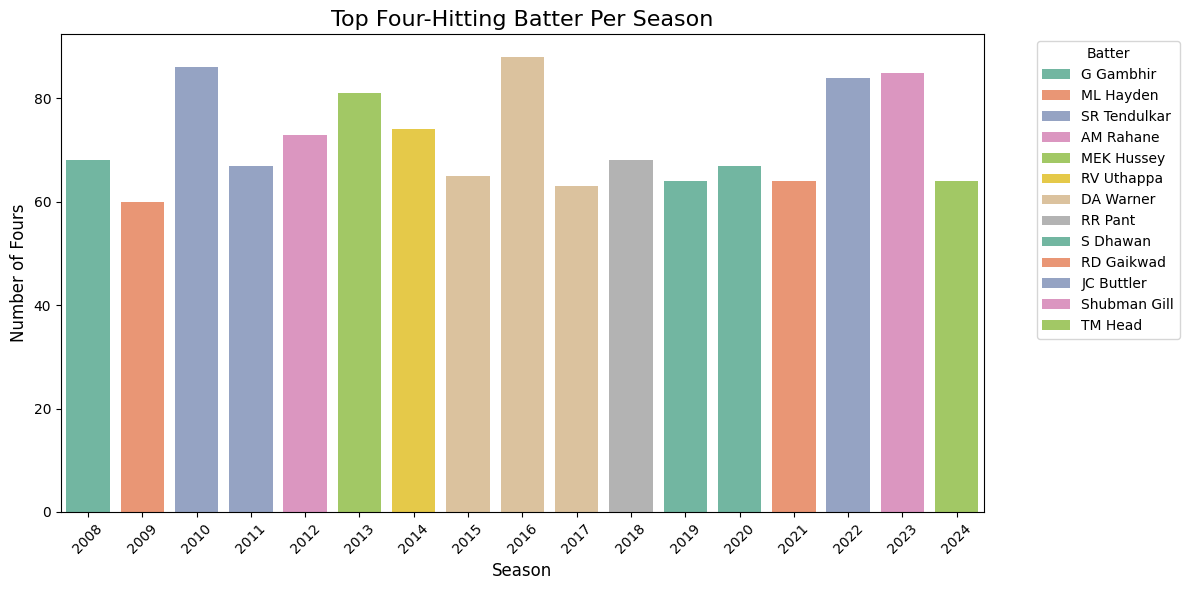

In [62]:
#  Filter only fours
fours = deliveries_with_year[deliveries_with_year['batsman_runs'] == 4]

#  Group by year and batter, count fours
fours_per_batter = fours.groupby(['year', 'batter']).size().reset_index(name='Fours')

# Get top batter per season
top_four_hitters = fours_per_batter.sort_values(['year', 'Fours'], ascending=[True, False]) \
                                   .groupby('year').head(1).reset_index(drop=True)
print("Top four-hitting batter per season:\n")
print(top_four_hitters)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_four_hitters, x='year', y='Fours', hue='batter', dodge=False, palette='Set2')

plt.title("Top Four-Hitting Batter Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Fours", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
#Number of Bowlers
bowlers = deliveries['bowler'].nunique()
print(f"Number of Bowlers: {bowlers}")

Number of Bowlers: 530


bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
dtype: int64


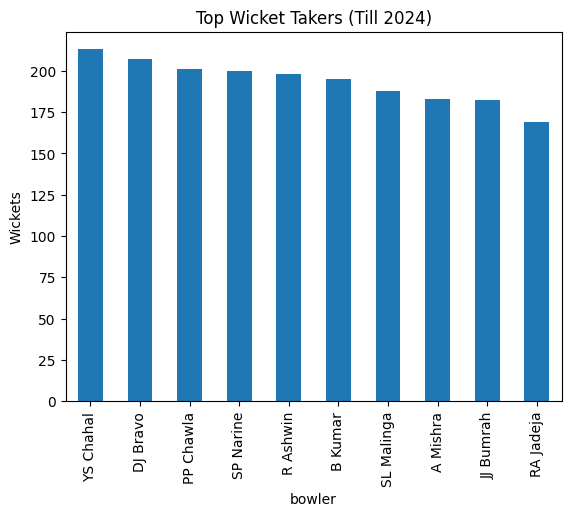

In [39]:
#Most wickets till 2024
wickets = deliveries[deliveries['player_dismissed'].notnull()]
most_wickets = wickets.groupby('bowler').size().sort_values(ascending=False).head(10)
print(most_wickets)
most_wickets.plot(kind='bar', title='Top Wicket Takers (Till 2024)')
plt.ylabel('Wickets')
plt.show()

Top wicket taker each year:
      year         bowler  wickets
77    2008  Sohail Tanvir       24
157   2009       RP Singh       26
248   2010        PP Ojha       22
375   2011     SL Malinga       30
447   2012       M Morkel       30
519   2013       DJ Bravo       34
650   2014      MM Sharma       26
708   2015       DJ Bravo       28
791   2016        B Kumar       24
879   2017        B Kumar       28
962   2018         AJ Tye       28
1077  2019       K Rabada       29
1161  2020       K Rabada       32
1232  2021       HV Patel       35
1402  2022      YS Chahal       29
1469  2023      MM Sharma       31
1542  2024       HV Patel       30


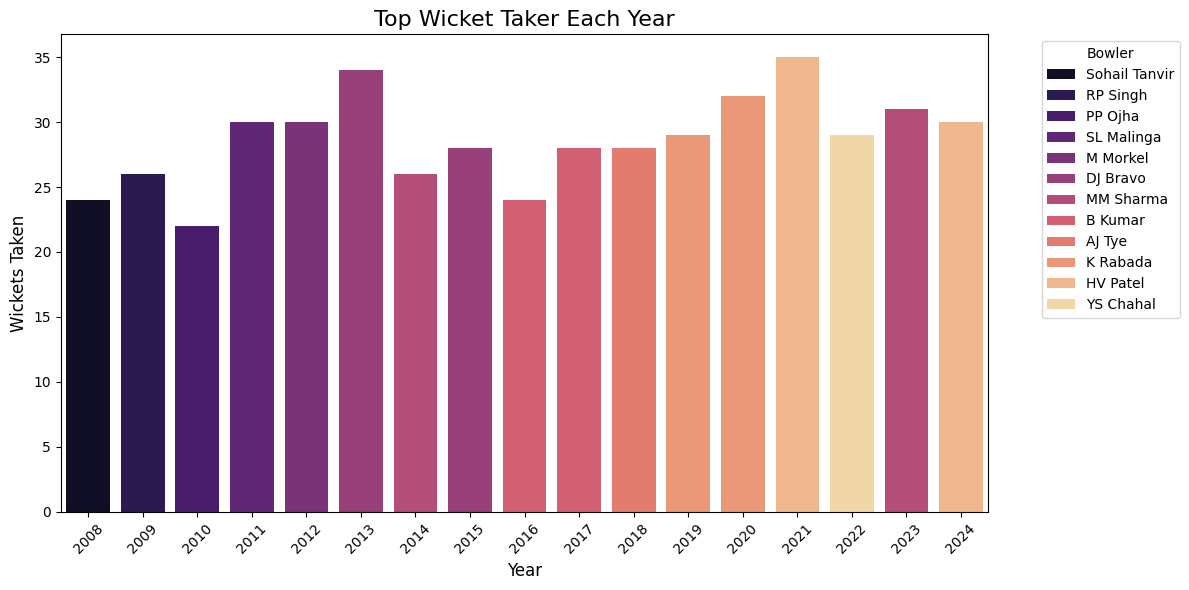

In [40]:
#Highest wicket taker each year
yearly_wickets = deliveries_with_year[deliveries_with_year['player_dismissed'].notnull()]
yearly_wkts = yearly_wickets.groupby(['year', 'bowler']).size().reset_index(name='wickets')
top_wkts_year = yearly_wkts.sort_values(['year', 'wickets'], ascending=[True, False]).groupby('year').head(1)
print("Top wicket taker each year:")
print(top_wkts_year)

# Plotting the top wicket taker each year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_wkts_year, x='year', y='wickets', hue='bowler', dodge=False, palette='magma')

plt.title('Top Wicket Taker Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Wickets Taken', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [41]:
#Maximum runs conceded in an over
worst_over = deliveries.groupby(['match_id', 'over', 'bowler'])['total_runs'].sum().reset_index()
worst_over_sorted = worst_over.sort_values(by='total_runs', ascending=False).head(5)
print("Worst overs (max runs conceded):")
print(worst_over_sorted)

Worst overs (max runs conceded):
       match_id  over          bowler  total_runs
32158   1254076    19        HV Patel          37
8581     501247     2  P Parameswaran          37
34286   1304060    15         DR Sams          35
5702     419139    12       RS Bopara          33
17587    734047     5         P Awana          33


In [44]:
#Most economical bowler (min 15 matches -> Almost a season)
bowler_stats = deliveries.groupby('bowler').agg(
    balls=('ball', 'count'),
    runs=('total_runs', 'sum'),
    matches=('match_id', pd.Series.nunique)
)
bowler_stats['economy'] = bowler_stats['runs'] / (bowler_stats['balls'] / 6)
bowler_stats = bowler_stats[bowler_stats['matches'] >= 15].sort_values('economy').head(10)
print("Most economical bowlers (min 15 matches):")
print(bowler_stats[['economy']])

Most economical bowlers (min 15 matches):
                   economy
bowler                    
A Kumble          6.646999
M Muralitharan    6.698292
J Yadav           6.738693
SP Narine         6.761216
RE van der Merwe  6.791209
DW Steyn          6.791411
DL Vettori        6.833121
Rashid Khan       6.907963
J Botha           6.922426
MJ Santner        6.940541


In [19]:
#Number of All-rounders
bat_set = set(deliveries['batter'].unique())
bowl_set = set(deliveries['bowler'].unique())
all_rounders = bat_set.intersection(bowl_set)
print(f"Number of All rounders: {len(all_rounders)}")

Number of All rounders: 471


,player,runs,wickets,total_contrib
291,RA Jadeja,2959,160,6159
338,SK Raina,5536,25,6036
348,SR Watson,3880,92,5720
95,DJ Bravo,1560,183,5220
347,SP Narine,1534,180,5134
176,KA Pollard,3437,69,4817
25,AD Russell,2488,115,4788
269,PP Chawla,624,192,4464
276,R Ashwin,800,181,4420
406,YS Chahal,37,205,4137


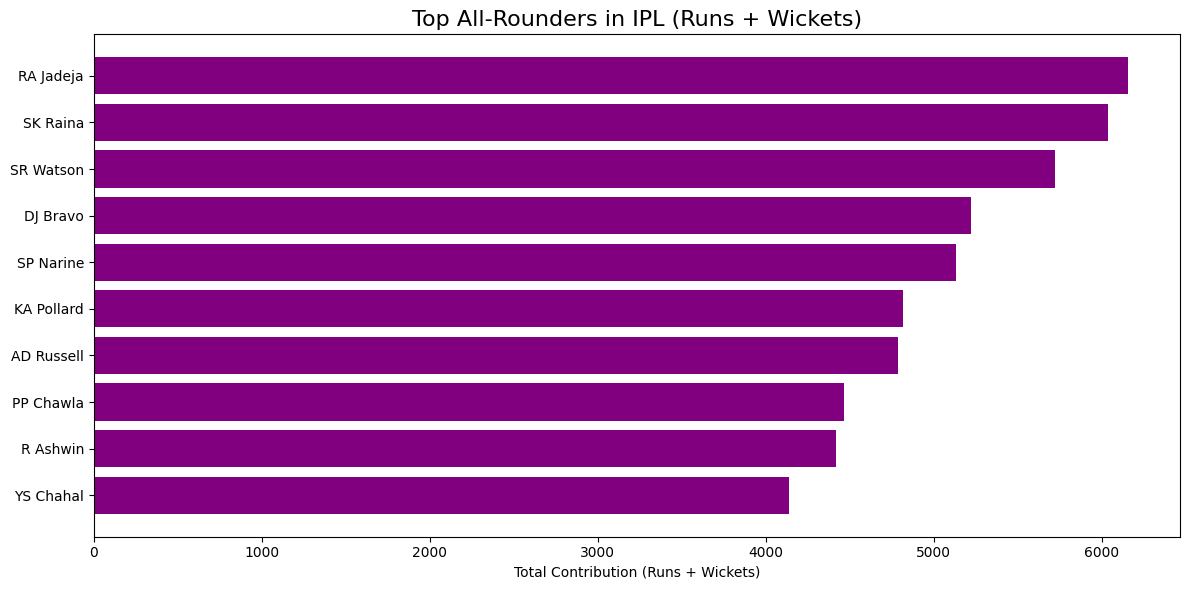

In [63]:
# Total runs by player
runs = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
runs.columns = ['player', 'runs']

# Total wickets
wickets = deliveries[deliveries['is_wicket'] == 1]
wickets = wickets[wickets['dismissal_kind'] != 'run out']
wicket_counts = wickets.groupby('bowler').size().reset_index(name='wickets')
wicket_counts.columns = ['player', 'wickets']

# Merge both
all_rounders = pd.merge(runs, wicket_counts, on='player')
all_rounders['total_contrib'] = all_rounders['runs'] + all_rounders['wickets'] * 20  # weight wickets higher
all_rounders= all_rounders[all_rounders['wickets']> 20]  # Filter out players with no wickets

top_all_rounders = all_rounders.sort_values('total_contrib', ascending=False).head(10)
display(top_all_rounders)
# Plotting the top all-rounders
plt.figure(figsize=(12, 6))
plt.barh(top_all_rounders['player'], top_all_rounders['total_contrib'], color='purple')
plt.xlabel('Total Contribution (Runs + Wickets)')
plt.title('Top All-Rounders in IPL (Runs + Wickets)', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##### Explore Data related with Teams

In [28]:
#Number of unique teams and their names
all_teams = pd.concat([matches['team1'], matches['team2'], matches['winner']]).dropna().unique()
print(f"Total number of unique IPL teams: {len(all_teams)}")
print("Team names:")
for team in sorted(all_teams):
    print(team)

Total number of unique IPL teams: 19
Team names:
Chennai Super Kings
Deccan Chargers
Delhi Capitals
Delhi Daredevils
Gujarat Lions
Gujarat Titans
Kings XI Punjab
Kochi Tuskers Kerala
Kolkata Knight Riders
Lucknow Super Giants
Mumbai Indians
Pune Warriors
Punjab Kings
Rajasthan Royals
Rising Pune Supergiant
Rising Pune Supergiants
Royal Challengers Bangalore
Royal Challengers Bengaluru
Sunrisers Hyderabad


     year                 batting_team  total_runs
6    2008             Rajasthan Royals        2601
9    2009              Deccan Chargers        2408
21   2010               Mumbai Indians        2738
24   2011          Chennai Super Kings        2560
34   2012          Chennai Super Kings        2831
47   2013               Mumbai Indians        2975
54   2014              Kings XI Punjab        2987
64   2015               Mumbai Indians        2734
74   2016  Royal Challengers Bangalore        2981
80   2017               Mumbai Indians        2800
84   2018          Chennai Super Kings        2809
96   2019               Mumbai Indians        2670
101  2020               Delhi Capitals        2780
108  2021          Chennai Super Kings        2733
123  2022             Rajasthan Royals        2943
128  2023               Gujarat Titans        3054
145  2024          Sunrisers Hyderabad        3052


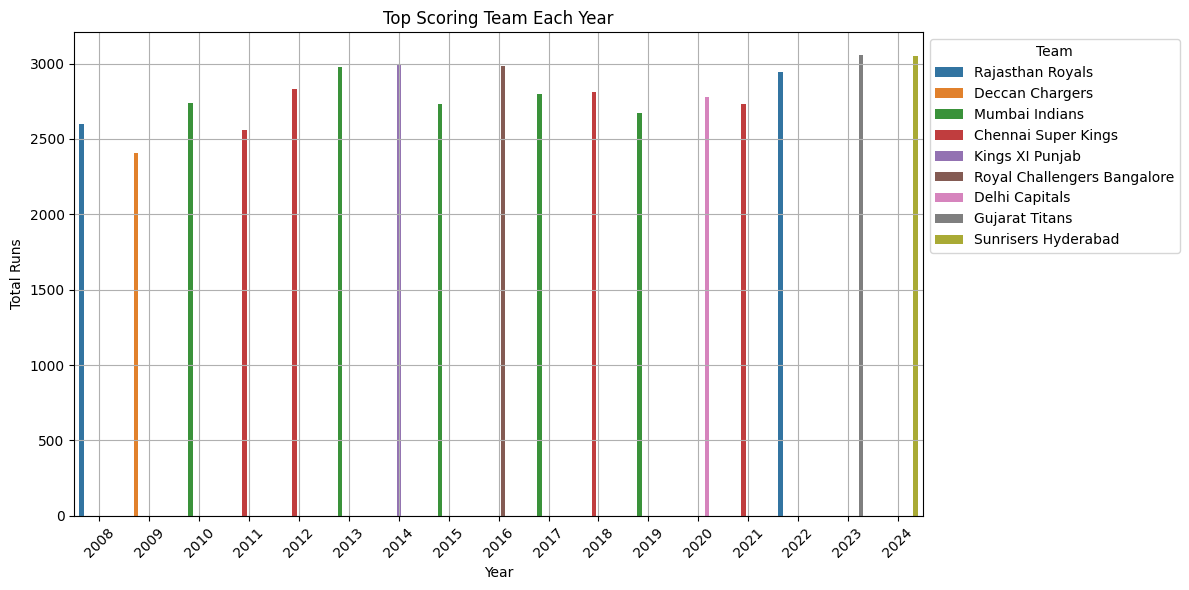

In [68]:

total_runs_yearly = deliveries_with_year.groupby(['year', 'batting_team'])['total_runs'].sum().reset_index()# Group by year and team, sum the total runs


sorted_runs = total_runs_yearly.sort_values(['year', 'total_runs'], ascending=[True, False])


top_team_each_year = sorted_runs.groupby('year').head(1)


print(top_team_each_year)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_team_each_year, x='year', y='total_runs', hue='batting_team')

plt.title('Top Scoring Team Each Year')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Maximum number of sixes hit by a team per season:

    year                 batting_team  Sixes
0   2008              Kings XI Punjab     95
1   2009              Deccan Chargers     99
2   2010          Chennai Super Kings     98
3   2011  Royal Challengers Bangalore     94
4   2012  Royal Challengers Bangalore    118
5   2013               Mumbai Indians    117
6   2014              Kings XI Punjab    127
7   2015               Mumbai Indians    120
8   2016  Royal Challengers Bangalore    142
9   2017               Mumbai Indians    118
10  2018          Chennai Super Kings    145
11  2019        Kolkata Knight Riders    143
12  2020               Mumbai Indians    137
13  2021          Chennai Super Kings    115
14  2022             Rajasthan Royals    137
15  2023               Mumbai Indians    140
16  2024          Sunrisers Hyderabad    178


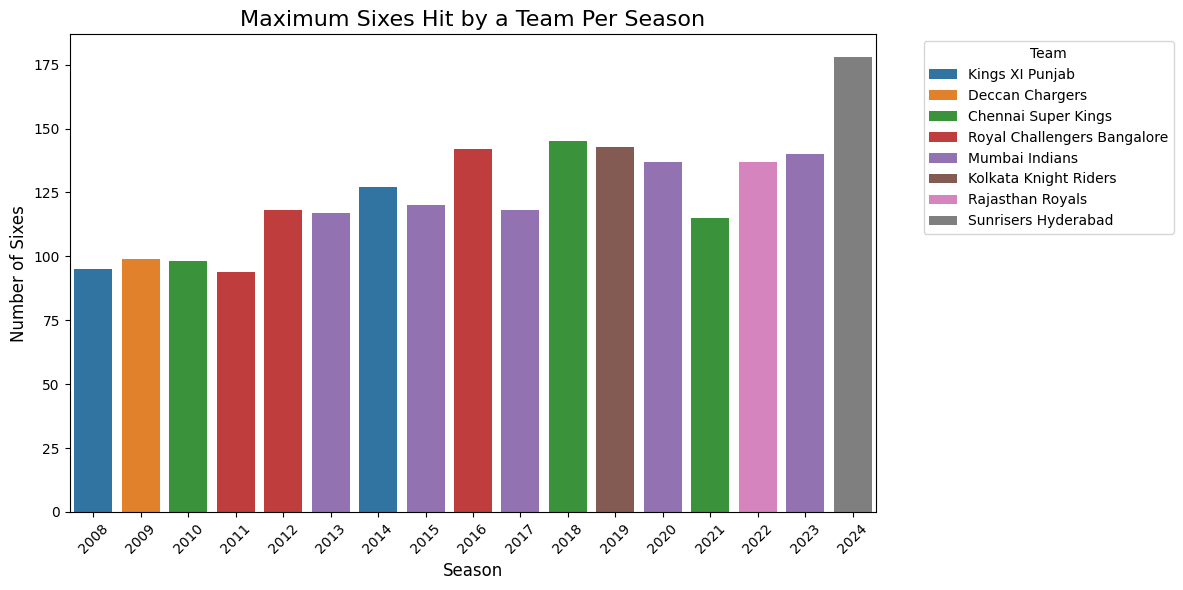

In [58]:
#Maximum number of 6's hit by a Team per season
# Step 1: Filter only sixes
sixes = deliveries_with_year[deliveries_with_year['batsman_runs'] == 6]

# Step 2: Group by year and team
sixes_per_team = sixes.groupby(['year', 'batting_team']).size().reset_index(name='Sixes')

# Step 3: Get team with max sixes per season
max_sixes_per_season = sixes_per_team.sort_values(['year', 'Sixes'], ascending=[True, False]) \
                                      .groupby('year').head(1).reset_index(drop=True)

# Step 4: Print result
print("Maximum number of sixes hit by a team per season:\n")
print(max_sixes_per_season)

plt.figure(figsize=(12, 6))
sns.barplot(data=max_sixes_per_season, x='year', y='Sixes', hue='batting_team', dodge=False, palette='tab10')

plt.title("Maximum Sixes Hit by a Team Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Sixes", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Maximum number of fours hit by a team per season:

    year                 batting_team  Fours
0   2008             Rajasthan Royals    259
1   2009          Chennai Super Kings    192
2   2010               Mumbai Indians    261
3   2011  Royal Challengers Bangalore    225
4   2012             Rajasthan Royals    246
5   2013             Rajasthan Royals    267
6   2014              Kings XI Punjab    262
7   2015          Chennai Super Kings    249
8   2016                Gujarat Lions    242
9   2017        Kolkata Knight Riders    228
10  2018        Kolkata Knight Riders    253
11  2019               Delhi Capitals    237
12  2020               Delhi Capitals    237
13  2021               Delhi Capitals    234
14  2022             Rajasthan Royals    251
15  2023               Mumbai Indians    265
16  2024        Kolkata Knight Riders    238


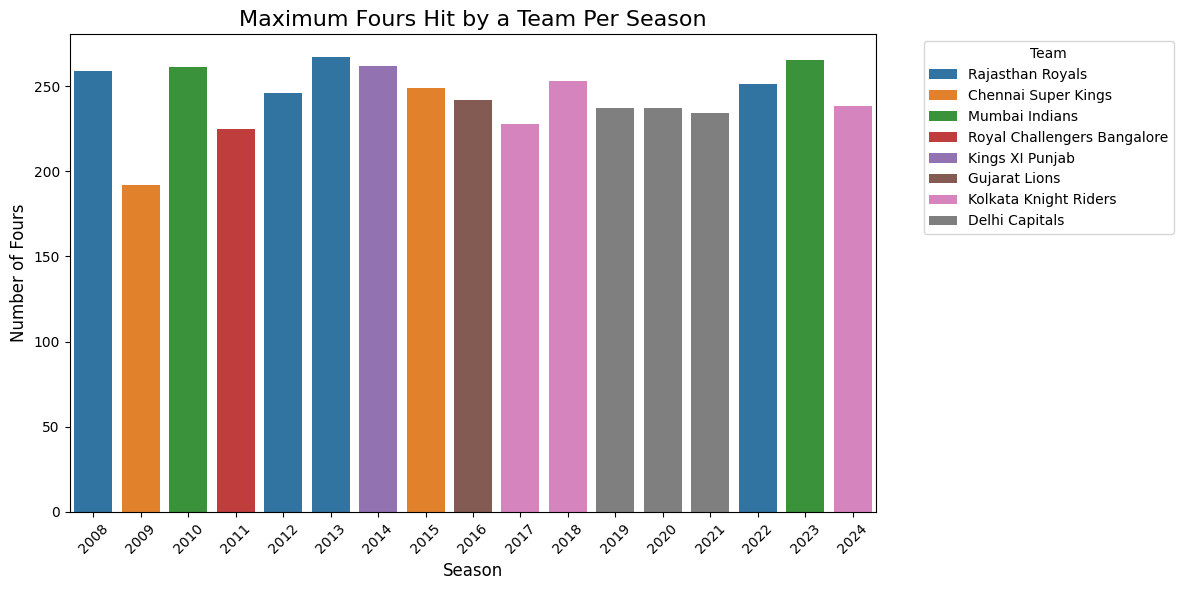

In [59]:
# Maximum number of 4's hit by a Team per season

# Step 1: Filter only fours
fours = deliveries_with_year[deliveries_with_year['batsman_runs'] == 4]

# Step 2: Group by year and team
fours_per_team = fours.groupby(['year', 'batting_team']).size().reset_index(name='Fours')

# Step 3: Get team with max fours per season
max_fours_per_season = fours_per_team.sort_values(['year', 'Fours'], ascending=[True, False]) \
                                      .groupby('year').head(1).reset_index(drop=True)

# Step 4: Print result
print("Maximum number of fours hit by a team per season:\n")
print(max_fours_per_season)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=max_fours_per_season, x='year', y='Fours', hue='batting_team', dodge=False, palette='tab10')

plt.title("Maximum Fours Hit by a Team Per Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Fours", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [69]:
#Team winning most home matches after winning toss
home_win_toss = matches[(matches['toss_winner'] == matches['team1']) &
                        (matches['winner'] == matches['team1'])]
home_wins = home_win_toss['team1'].value_counts()
print("Team with most home wins after winning toss:")
print(home_wins.head(5))

Team with most home wins after winning toss:
Mumbai Indians                 33
Chennai Super Kings            33
Kolkata Knight Riders          29
Royal Challengers Bangalore    26
Rajasthan Royals               21
Name: team1, dtype: int64


In [74]:
#Team winning most home matches after losing toss
home_lose_toss = matches[(matches['toss_winner'] != matches['team1']) &
                         (matches['winner'] == matches['team1'])]
home_wins_lost_toss = home_lose_toss['team1'].value_counts()
print("Team with most home wins after losing toss:")
print(home_wins_lost_toss.head(5))

Team with most home wins after losing toss:
Chennai Super Kings            42
Royal Challengers Bangalore    40
Mumbai Indians                 37
Kolkata Knight Riders          36
Rajasthan Royals               34
Name: team1, dtype: int64


In [77]:
#Team winning most Away matches after winning toss
away_win_toss = matches[(matches['toss_winner'] == matches['team2']) &
                        (matches['winner'] == matches['team2'])]
away_wins = away_win_toss['team2'].value_counts()
print("Team with most Away wins after winning toss:")
print(away_wins.head(5))

Team with most Away wins after winning toss:
Mumbai Indians                 45
Chennai Super Kings            42
Kolkata Knight Riders          39
Rajasthan Royals               39
Royal Challengers Bangalore    31
Name: team2, dtype: int64


In [80]:
#Team winning most Away matches after loosimg toss
away_win_toss = matches[(matches['toss_winner'] != matches['team2']) &
                        (matches['winner'] == matches['team2'])]
away_wins = away_win_toss['team2'].value_counts()
print("Team with most Away wins after loosing toss:")
print(away_wins.head(5))

Team with most Away wins after loosing toss:
Mumbai Indians           29
Kolkata Knight Riders    27
Kings XI Punjab          24
Chennai Super Kings      21
Sunrisers Hyderabad      19
Name: team2, dtype: int64


In [71]:
#Away match winners by year
away_wins = matches[matches['team2'] == matches['winner']]
away_wins_per_year = away_wins.groupby(['year', 'winner']).size().reset_index(name='wins')
print("Assumed Away (team2) Wins Each Year:")
print(away_wins_per_year)

Assumed Away (team2) Wins Each Year:
     year                       winner  wins
0    2008          Chennai Super Kings     5
1    2008              Deccan Chargers     2
2    2008             Delhi Daredevils     3
3    2008              Kings XI Punjab     4
4    2008        Kolkata Knight Riders     2
..    ...                          ...   ...
139  2024               Mumbai Indians     2
140  2024                 Punjab Kings     5
141  2024             Rajasthan Royals     7
142  2024  Royal Challengers Bengaluru     3
143  2024          Sunrisers Hyderabad     3

[144 rows x 3 columns]


In [66]:
# Count of wins per team per venue
venue_performance = matches.groupby(['venue', 'winner']).size().reset_index(name='wins')
venue_top = venue_performance.sort_values('wins', ascending=False).groupby('venue').head(1)

display(venue_top.head(10))


,venue,winner,wins
88,Eden Gardens,Kolkata Knight Riders,45
360,Wankhede Stadium,Mumbai Indians,42
169,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,33
300,Sawai Mansingh Stadium,Rajasthan Royals,32
152,M Chinnaswamy Stadium,Royal Challengers Bangalore,29
104,Feroz Shah Kotla,Delhi Daredevils,23
272,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,20
249,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
260,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,10
372,"Wankhede Stadium, Mumbai",Mumbai Indians,10


Match Outcome Summary:
Total Matches: 1095
Close Games: 166
Big Wins: 350


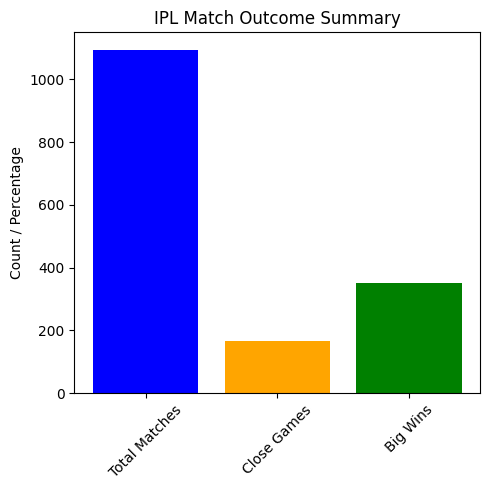

In [76]:
# Match Summary - number of close games and big wins
close_games = matches[
    ((matches['result'] == 'runs') & (matches['result_margin'] <= 10)) |
    ((matches['result'] == 'wickets') & (matches['result_margin'] <= 3))
]

# 💥 Define big wins: by 50 runs or more, or by 7 wickets or more
big_wins = matches[
    ((matches['result'] == 'runs') & (matches['result_margin'] >= 50)) |
    ((matches['result'] == 'wickets') & (matches['result_margin'] >= 7))
]

# 📊 Create a summary dictionary
summary = {
    'Total Matches': len(matches),
    'Close Games': len(close_games),
    'Big Wins': len(big_wins),
    #'Close Game %': round(len(close_games) / len(matches) * 100, 2),
    #'Big Win %': round(len(big_wins) / len(matches) * 100, 2)
}

# 🖨️ Print summary using standard print
print("Match Outcome Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Plotting the summary
plt.figure(figsize=(5, 5))
plt.bar(summary.keys(), summary.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('IPL Match Outcome Summary')
plt.ylabel('Count / Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#### Data Quality

58

#### Data Cleaning

#### Data Preparation

#### Data Preparation

In [115]:
df_matches = pd.read_csv("matches.csv")
df_deliveries = pd.read_csv("deliveries.csv")


In [116]:
print(df_deliveries.shape)
print(df_matches.shape)


(260920, 17)
(1095, 20)


In [117]:
# Date to Year for better EDA
df_matches['year'] = pd.to_datetime(matches['date']).dt.year

In [118]:
df_deliveries['id'] = df_deliveries['match_id']
df_del = df_deliveries.drop(columns='match_id')

In [119]:
(df_del.id.dtype)

dtype('int64')

In [120]:
df_matches.id.dtype

dtype('int64')

In [121]:
merged_df = pd.merge(df_del,df_matches, on='id',how='outer' )
merged_df.shape

(260920, 37)

In [122]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            260920 non-null  int64  
 1   batting_team      260920 non-null  object 
 2   bowling_team      260920 non-null  object 
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batter            260920 non-null  object 
 6   bowler            260920 non-null  object 
 7   non_striker       260920 non-null  object 
 8   batsman_runs      260920 non-null  int64  
 9   extra_runs        260920 non-null  int64  
 10  total_runs        260920 non-null  int64  
 11  extras_type       14125 non-null   object 
 12  is_wicket         260920 non-null  int64  
 13  player_dismissed  12950 non-null   object 
 14  dismissal_kind    12950 non-null   object 
 15  fielder           9354 non-null    object 
 16  id                26

In [123]:
# merged_df.to_csv("merged_matches&devlieries.csv")

#### Data Quality

In [170]:
df = merged_df.copy()

In [171]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object', 'category']).columns.tolist()

summary_data = [
    ["Numeric", len(numeric_cols), ", ".join(numeric_cols) if numeric_cols else "None"],
    ["Categorical", len(categorical_cols), ", ".join(categorical_cols) if categorical_cols else "None"],
    ["Other", len(other_cols), ", ".join(other_cols) if other_cols else "None"]
]

column_summary = pd.DataFrame(summary_data, columns=["Column Type", "Count", "Columns"])
display(column_summary)

,Column Type,Count,Columns
0,Numeric,12,"inning, over, ball, batsman_runs, extra_runs, ..."
1,Categorical,25,"batting_team, bowling_team, batter, bowler, no..."
2,Other,0,None


In [172]:
# Check for Missing Values
print(df.shape)
df.isnull().sum().sort_values(ascending=False)

(260920, 37)


method              257274
fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
city                 12397
result_margin         4124
player_of_match        490
winner                 490
target_runs            309
target_overs           309
result                   0
toss_decision            0
super_over               0
umpire1                  0
umpire2                  0
toss_winner              0
team2                    0
team1                    0
venue                    0
inning                   0
match_type               0
date                     0
batting_team             0
season                   0
id                       0
is_wicket                0
total_runs               0
extra_runs               0
batsman_runs             0
non_striker              0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
year                     0
d

In [173]:
df.method.unique()

array([nan, 'D/L'], dtype=object)

In [174]:
# dropping method because we are not taking matches with no results due to some unseen circumstances 
# drop date as we are using year

df.drop(columns=['method','date','fielder','result_margin'], inplace=True)

In [175]:
df.shape

(260920, 33)

In [176]:
df['dismissal_kind'].value_counts(dropna=False)

NaN                      247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: dismissal_kind, dtype: int64

In [177]:
df['player_dismissed'].value_counts(dropna=False)

NaN            247970
RG Sharma         223
V Kohli           207
S Dhawan          193
KD Karthik        184
                ...  
BJ Haddin           1
SS Cottrell         1
JE Taylor           1
NL McCullum         1
Sunny Gupta         1
Name: player_dismissed, Length: 630, dtype: int64

In [178]:
df['extras_type'].value_counts(dropna=False)

NaN        246795
wides        8380
legbyes      4001
noballs      1069
byes          673
penalty         2
Name: extras_type, dtype: int64

In [179]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [180]:
df['team1'].unique()


array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [181]:
df['city'].value_counts(dropna=False)

Mumbai            41742
Kolkata           21846
Delhi             21269
Chennai           20706
Hyderabad         18355
Bangalore         14907
Chandigarh        14476
Jaipur            13520
NaN               12397
Pune              12239
Abu Dhabi          8799
Ahmedabad          8553
Bengaluru          6917
Durban             3643
Visakhapatnam      3537
Lucknow            3283
Dubai              3149
Dharamsala         3141
Centurion          2866
Rajkot             2381
Sharjah            2355
Navi Mumbai        2188
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Cape Town          1539
Raipur             1431
Mohali             1235
Kochi              1155
Kanpur              921
Nagpur              742
Guwahati            739
Kimberley           726
East London         715
Bloemfontein        500
Name: city, dtype: int64

In [182]:
df_city_nan = df[df['city'].isna()]
print(df_city_nan.id.nunique())
print(df_city_nan.venue.unique())

51
['Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']


In [183]:
# Replacing nan values with values that make sense for our dataset
df['dismissal_kind'].fillna('Not_Dismissed', inplace=True)
df['player_dismissed'].fillna('Not_Dismissed', inplace=True)
df['extras_type'].fillna('No_extras', inplace=True)
df['city'].fillna('UAE', inplace=True)

In [187]:
df_quality = df.dropna(subset=['player_of_match', 'winner', 'target_runs', 'target_overs']).reset_index(drop=True)


In [188]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260430 entries, 0 to 260429
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            260430 non-null  int64  
 1   batting_team      260430 non-null  object 
 2   bowling_team      260430 non-null  object 
 3   over              260430 non-null  int64  
 4   ball              260430 non-null  int64  
 5   batter            260430 non-null  object 
 6   bowler            260430 non-null  object 
 7   non_striker       260430 non-null  object 
 8   batsman_runs      260430 non-null  int64  
 9   extra_runs        260430 non-null  int64  
 10  total_runs        260430 non-null  int64  
 11  extras_type       260430 non-null  object 
 12  is_wicket         260430 non-null  int64  
 13  player_dismissed  260430 non-null  object 
 14  dismissal_kind    260430 non-null  object 
 15  id                260430 non-null  int64  
 16  season            26

#### Data Cleaning

In [189]:
raw_clean_df = df_quality.copy()

In [194]:
raw_clean_df.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter',
       'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs',
       'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'id',
       'season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'target_runs', 'target_overs', 'super_over', 'umpire1', 'umpire2',
       'year'],
      dtype='object')

In [190]:
teams_map = {'Royal Challengers Bangalore':'Bangalore'
              , 'Kings XI Punjab':'Punjab'
              , 'Delhi Daredevils':'Delhi'
              , 'Mumbai Indians':'Mumbai'
              , 'Kolkata Knight Riders':'Kolkata'
              , 'Rajasthan Royals':'Rajasthan'
              , 'Deccan Chargers':'Hyderabad'
              , 'Chennai Super Kings':'Chennai'
              , 'Kochi Tuskers Kerala':'Kerala'
              , 'Pune Warriors':'Pune'
              , 'Sunrisers Hyderabad':'Hyderabad'
              , 'Gujarat Lions':'Gujarat'
              , 'Rising Pune Supergiants':'Pune'
              , 'Rising Pune Supergiant':'Pune'
              , 'Delhi Capitals':'Delhi'
              , 'Punjab Kings':'Punjab'
              , 'Lucknow Super Giants':'Lucknow'
              , 'Gujarat Titans':'Gujarat'
              , 'Royal Challengers Bengaluru':'Bangalore'
}
for col in (raw_clean_df.columns):
    raw_clean_df[col] = raw_clean_df[col].apply(lambda x: teams_map.get(x, x))

In [191]:
venue_mapping = {
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium'
}
for col in (raw_clean_df.columns):
    raw_clean_df[col] = raw_clean_df[col].apply(lambda x: venue_mapping.get(x, x))

In [199]:
print(f"Unique values in Team before mapping: {df_quality.team1.nunique()}")
print(f"Unique values in Team after mapping: {raw_clean_df.team1.nunique()}")
print("The reduction in unique Team values indicates that different categories have been properly mapped to unified values.\n")

print(f"Unique values in Venue before mapping: {df_quality.venue.nunique()}")
print(f"Unique values in Venue after mapping: {raw_clean_df.venue.nunique()}")
print("The decrease in unique Venue values confirms that varying category names have been correctly consolidated.")


Unique values in Team before mapping: 19
Unique values in Team after mapping: 12
The reduction in unique Team values indicates that different categories have been properly mapped to unified values.



Unique values in Venue before mapping: 58
Unique values in Venue after mapping: 43
The decrease in unique Venue values confirms that varying category names have been correctly consolidated.


In [202]:
final_cleaned_df = raw_clean_df.copy()

In [206]:
merged_df.shape

(260920, 37)

In [203]:
final_cleaned_df.shape

(260430, 33)

In [205]:
final_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260430 entries, 0 to 260429
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   inning            260430 non-null  int64  
 1   batting_team      260430 non-null  object 
 2   bowling_team      260430 non-null  object 
 3   over              260430 non-null  int64  
 4   ball              260430 non-null  int64  
 5   batter            260430 non-null  object 
 6   bowler            260430 non-null  object 
 7   non_striker       260430 non-null  object 
 8   batsman_runs      260430 non-null  int64  
 9   extra_runs        260430 non-null  int64  
 10  total_runs        260430 non-null  int64  
 11  extras_type       260430 non-null  object 
 12  is_wicket         260430 non-null  int64  
 13  player_dismissed  260430 non-null  object 
 14  dismissal_kind    260430 non-null  object 
 15  id                260430 non-null  int64  
 16  season            26

### Gold layer 
#### Final dataset for training respective ML model approaches for team members

In [207]:
gold_df = final_cleaned_df.copy()

In [208]:
gold_df.to_csv('gold_df.csv')